# Example Exam
**Notation**: Vector and matrices must be visually distinguishable. Transposed vectors and matrices are to be marked as such, also in scalar products and outer products.
## Part I: Understanding (11 CP)
### 1 a) Artificial Neural Networks (2 CP)
Give, and explain the importance of, the *Universal Approximation Theoryem* for artificial neural networks.

### 1 b) Gaussians (4 CP)
Sketch the distribution of two random variables $x$ and $y$, if they follow a joint Gaussian distribution of positive covariance (1 CP). Then ...
- ...indicate $\langle x\rangle$ and $\langle y\rangle$ in your sketch (1 CP)
- ...add the marginal distribution of $x$ to your plot (1 CP)
- ...and the conditional distribution for $y$, if $x = x_0 \neq \langle x\rangle$ (1 CP)

### 1 c) Define and explain the following quantities (2 CP)
1. Posterior (0.5 CP)
2. Likelihood (0.5 CP)
3. Prior (0.5 CP)
5. Burnin (0.5 CP)

### 1 d) Chi-squared test (3 CP)
Describe the $\chi²/\text{degF}$ test (1 CP). Name one caveat against it, involving the value of $\chi²$ (1 CP). Name on caveat against it, involving the degrees of freemdom degF (1 CP)

### 1 e) Normalization (1 CP)
if $P(x)$ is said to be normalized, with respect to which variable is it then normalized? Which equation describes 'normalization'? Finally, if $P(x)$ is normalized, is $P(\theta|x)$ normalized?

## Part II: Analytics (9 CP)

### 2 a) Simple Malmquist bias (5 CP)
Imagine stars have an apparent brightness $b$ which follows a Gaussian distribution $G$ of mean $b_0$ and variance $\sigma²$. Your telescope is only able to detect stars with $b > b_t$.

1. Which sampling distribution do the apparent brightnesses of the stars observable through your telescope have? I.e.: Derive the sampling distribution of observable $b$ (2 CP).
2. Imagine you measured 10 brightnesses, $\vec{b}^T = (b_1,...,b_{10}$. Adopt a prior and give the posterior for the mean $b_0$ (2 CP).
3. If $b_t < b_0$, can you still infer $b_0$? Give a reason (1 CP)

### 2 b) Sums
For $\mu \sim G(0,1)$ and $v \sim G(0,1)$, with $u,v$ independent, derive the distribution of their sum $y = u + v$

## Part III: Numerics (10 CP)

**Important**: Submit all source files and multiple screenschots of your code and your (labelled!) plots. Your code should contain your name in a introductory comment line. All submitted files should contain your name. Submit your files to: sellentin@strw.leidenuniv.nl, tutor1@leiden.nl, tutor2@leiden.nl. Before leaving the room, please come to the front and confirm receipt of your files.

### 3 a) Markov Chain Manipulations (8 CP)
Open the file 'MarkovChain.txt'. It contains 3 columns, the first being samples of a stellar mass $M$, the second being samples of stellar distances $r$ in kpc (kpc: 'kiloparsec', an astronomical measure of distance). The third column is the log-likelihood. The first row is a header, the number of samples is 6000.

1. Read in the chain (0 CP)

In [2]:
# Initialisations.
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Read in the data file with np.loadtxt.
markov_chain = np.loadtxt('MarkovChain.txt',dtype=float,comments='#',delimiter=None,skiprows=0,usecols=None)
print(f'Shape of data: {markov_chain.shape}') # Print shape of the data.

Shape of data: (6000, 3)


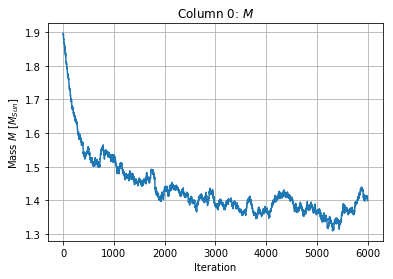

In [47]:
# Just making some plots to get a better overview of the data.
number_array = np.linspace(1,6000,6000)
plt.plot(number_array,markov_chain[:,0])
plt.title('Column 0: Mass')
plt.xlabel('Iteration'); plt.ylabel('Mass $M$ $[M_{Sun}]$')
plt.grid()
plt.show()

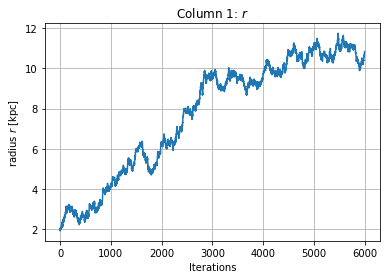

In [32]:
# Same for the second column ...
plt.plot(number_array,markov_chain[:,1])
plt.title('Column 1: Radius')
plt.xlabel('Iterations'); plt.ylabel('radius $r$ [kpc]')
plt.grid()
plt.show()

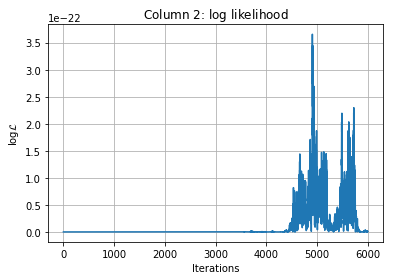

In [49]:
# ... and third column.
plt.plot(number_array,markov_chain[:,2])
plt.title('Column 2: $\log$ likelihood')
plt.xlabel('Iterations'); plt.ylabel('$\log \mathcal{L}$')
plt.grid()
plt.show()

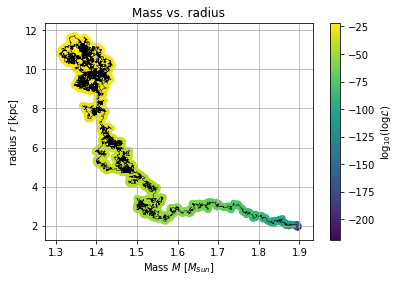

In [68]:
# Plotting the mass versus the radius, with the $\log$ likelihood as color map.
plt.plot(markov_chain[:,0],markov_chain[:,1],lw=0.5,c='k')
plt.title('Mass vs. radius')
plt.xlabel('Mass $M$ $[M_{Sun}]$'); plt.ylabel('radius $r$ [kpc]')
plt.scatter(markov_chain[:,0],markov_chain[:,1],c=np.log10(markov_chain[:,2]))
cbar = plt.colorbar()
cbar.set_label('$\log_{10}(\log \mathcal{L})$')
plt.grid()
plt.show()

2. Remove the burnin of the chain: Write up your argumentation line of what you are doing, and support it with a plot (2 CP).

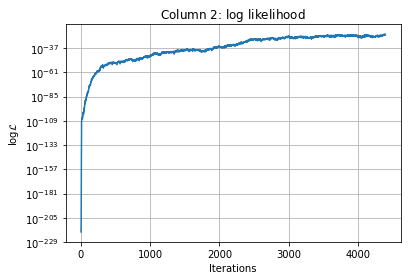

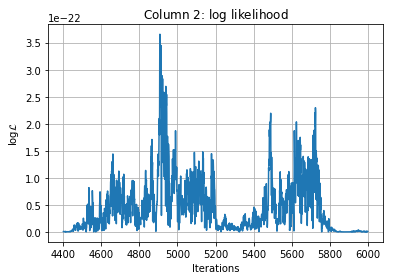

In [97]:
# Set up a boundary to see where the likelihood changes behaviour.

plt.plot(number_array[:boundary],markov_chain[:boundary,2])
plt.title('Column 2: $\log$ likelihood')
plt.xlabel('Iterations'); plt.ylabel('$\log \mathcal{L}$')
plt.yscale('log')
plt.grid()
plt.show()

plt.plot(number_array[boundary:],markov_chain[boundary:,2])
plt.title('Column 2: $\log$ likelihood')
plt.xlabel('Iterations'); plt.ylabel('$\log \mathcal{L}$')
plt.grid()
plt.show()

**Argumentation for removing a part of the chain**: 

3. Store the new, burnin-free chain in a new vector (0.5 CP) and plot the new chain (0.5 CP).

In [100]:
# Create a new array with only the last 1500 values of the markov_chain.
new_markov_chain = markov_chain[4500:]

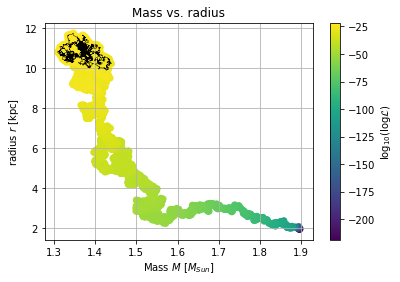

In [101]:
# Plot the new chain.
plt.plot(new_markov_chain[:,0],new_markov_chain[:,1],lw=0.5,c='k')
plt.title('Mass vs. radius')
plt.xlabel('Mass $M$ $[M_{Sun}]$'); plt.ylabel('radius $r$ [kpc]')
plt.scatter(markov_chain[:,0],markov_chain[:,1],c=np.log10(markov_chain[:,2]))
cbar = plt.colorbar()
cbar.set_label('$\log_{10}(\log \mathcal{L})$')
plt.grid()
plt.show()

In the above plot you can see which part of the new markov chain is kept.

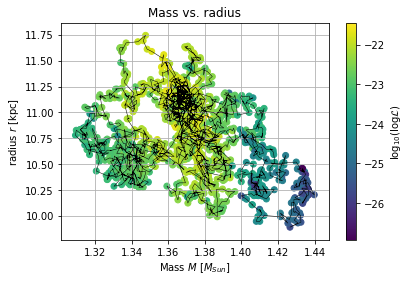

In [102]:
plt.plot(new_markov_chain[:,0],new_markov_chain[:,1],lw=0.5,c='k')
plt.title('Mass vs. radius')
plt.xlabel('Mass $M$ $[M_{Sun}]$'); plt.ylabel('radius $r$ [kpc]')
plt.scatter(new_markov_chain[:,0],new_markov_chain[:,1],c=np.log10(new_markov_chain[:,2]))
cbar = plt.colorbar()
cbar.set_label('$\log_{10}(\log \mathcal{L})$')
plt.grid()
plt.show()

Now zoomed in the relevant part.

4. Are the mass $M$ and the stellar distances $r$ correlated (1 CP)? Support your answer by a plot or calculation (1 CP)

5. Plot the distribution $P(M)$ (0.5 CP) and $P(r) (0.5 CP).

6. Plot the distributions $P(M|r=\text{5 kpc}$ (1 CP)

7. Plot the distribution $P(M|r = \text{10 kpc}$ (1 CP)

### 3 b) Sampling (2 CP)

- Generate 5000 random samples from a uniform distribution with limits [0,1] (0.5 CP)

- For the remainder of this exercise, do not use a random number generator anymore. Instead work with the samples you already have.
    - Transform your samples to now sample from a Uniform distribution with limits [-1,+1] (0.5 CP)

     - Use your samples to generate samples from a triangular distribution (1 CP)